In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [14]:
VARIABLES = [
    ['BASS_P',0.001,0.003,0.005],
    ['BASS_Q',0.3,0.5,0.7],
    ['GROWTH',0.003,0.007,0.009],
    ['MILES',3000000,3130509,3200000],
    ['REG_RATIO',0.009,0.01054142011,0.011],
    ['AV_FRACTION',0.09,0.1,0.15]
]

In [15]:
def BassModel(p, q, t):
	a = q/p
	b = p+q
	x = math.exp(-1 * b * t)
	y = 1 + a * x
	bass = (b ** 2 * x) / (p * y ** 2)
	return bass

def GetFatalities(input_vars):
	p_var = input_vars[0]
	q_var = input_vars[1]
	growth_var = input_vars[2]
	miles_var = [input_vars[3]]
	ratio_var = input_vars[4]
	fraction_var = input_vars[5]
	new = [0]
	avmiles = [0]
	regmiles = [(miles_var[0] - avmiles[0])]
	i = 0
	while i < 30:
		miles_var.append(miles_var[i]*(1 + growth_var))
		i = i + 1
		new.append(BassModel(p_var, q_var, i))
		cumulative = np.sum(new)
		avmiles.append(cumulative * miles_var[i])
		regmiles.append(miles_var[i] - avmiles[i])
	totaldeaths = np.sum(regmiles)*ratio_var + np.sum(avmiles)*ratio_var*fraction_var
	return int(totaldeaths)

def GetOrdered(matrix):
	order = []
	for each in matrix:
		order.append(each[3])
	array = np.asarray(order)
	temp = array.argsort()
	ranks = np.arange(len(array))[temp.argsort()]
	w, h = 4, len(VARIABLES)
	omatrix = [[0 for x in range(w)] for y in range(h)]
	size = len(ranks)-1
	i = 0
	for each in ranks:
		omatrix[(size-each)] = matrix[i]
		i = i + 1
	return omatrix


def PlotTornado(matrix, base):
	values = []
	for each in matrix:
		values.append(each[3])
	lows = []
	for each in matrix:
		lows.append(each[1])
	variables=[]
	for each in matrix:
		variables.append(each[0])
	ys = range(len(values))[::-1]  # top to bottom
	# Plot the bars, one by one
	for y, low, value in zip(ys, lows, values):
		# The width of the 'low' and 'high' pieces
		low_width = base - low
		high_width = low + value - base
		# Each bar is a "broken" horizontal bar chart
		plt.broken_barh(
			[(low, low_width), (base, high_width)],
			(y - 0.4, 0.8),
			facecolors=['white', 'white'],  # Try different colors if you like
			edgecolors=['black', 'black'],
			linewidth=1,
		)
		# Display the value as text. It should be positioned in the center of
		# the 'high' bar, except if there isn't any room there, then it should be
		# next to bar instead.
		x = base + high_width / 2
		if x <= base + 50:
			x = base + high_width + 50
		plt.text(x, y, str(value), va='center', ha='center')
	# Draw a vertical line down the middle
	plt.axvline(base, color='black')
	# Position the x-axis on the top, hide all the other spines (=axis lines)
	axes = plt.gca()  # (gca = get current axes)
	axes.spines['left'].set_visible(False)
	axes.spines['right'].set_visible(False)
	axes.spines['bottom'].set_visible(False)
	axes.xaxis.set_ticks_position('top')
	plt.yticks(ys, variables) # Make the y-axis display the variables
	# Set the portion of the x- and y-axes to show
	scale = 1.1*max((lows[0]+values[0]-base), (base-lows[0]))
	plt.xlim(base - scale, base + scale)
	plt.ylim(-1, len(variables))





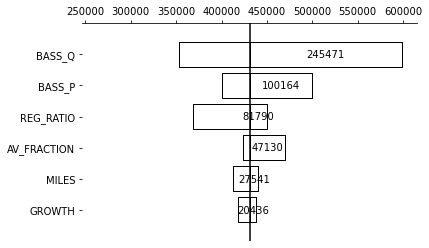

In [16]:
mean_vals = [VARIABLES[0][2], VARIABLES[1][2],
    VARIABLES[2][2], VARIABLES[3][2], VARIABLES[4][2],
    VARIABLES[5][2]]
mean_deaths = GetFatalities(mean_vals)
w, h = 4, len(VARIABLES)
Matrix = [[0 for x in range(w)] for y in range(h)]
i = 0
while i < len(VARIABLES):
    Matrix[i][0]=VARIABLES[i][0]
    model_vals = list(mean_vals)
    model_vals[i] = VARIABLES[i][1]
    boundary_one=GetFatalities(model_vals)
    model_vals = list(mean_vals)
    model_vals[i] = VARIABLES[i][3]
    boundary_two=GetFatalities(model_vals)
    if boundary_one>boundary_two:
        Matrix[i][1] = boundary_two
        Matrix[i][2] = boundary_one
        Matrix[i][3]=boundary_one - boundary_two
    else:
        Matrix[i][1] = boundary_one
        Matrix[i][2] = boundary_two
        Matrix[i][3]=boundary_two - boundary_one
    i = i+1
ordered_matrix = GetOrdered(Matrix)
PlotTornado(ordered_matrix, mean_deaths)
plt.show()
# adding this on 6 march 2018 to test git sync

